In [24]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [25]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

In [26]:
warnings.filterwarnings('ignore')

In [27]:
df_homeless = pd.read_csv("apartment data homeless.csv" ,index_col=0) 
df_homeless

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm
0,דירה,רמת גן,משה שרת,5.0,1,"3,120,000 ₪",1,0,1,0,1,114
1,דו משפחתי,רמת גן,יד שלום,4.0,1,"4,480,000 ₪",0,0,0,1,1,140
2,דו משפחתי,רמת ישי,פיקוס 5,6.0,קרקע,"2,250,000 ₪",1,0,0,1,1,180
3,דירה,רמת גן,שלם,3.0,1,"2,150,000 ₪",0,0,0,0,0,80
4,דירה,תל אביב יפו,הפלמ''ח,3.0,2,"2,500,000 ₪",1,1,0,1,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
11962,פנטהאוז,רמת גן מגדל סיטי טאוור,פארק צמרת מגדל סיטי טאוור,3.0,30,"4,900,000 ₪",0,1,1,1,1,125
11963,בית פרטי,פתח תקווה,כפר גנים ב,6.0,0,"3,800,000 ₪",1,1,0,1,1,182
11964,וילה,פתח תקווה,בת גנים,9.0,0,"7,800,000 ₪",1,1,1,1,1,550
11965,פנטהאוז,פתח תקווה,אם המושבות החדשה,5.0,19,"3,330,000 ₪",0,1,1,1,1,160


In [28]:
df_ad = pd.read_csv("apartment data ad website.csv" ,index_col=0)
df_ad

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm
0,\r\n דירה\r\n,\r\n יהוד מונוסון\r\n ...,\r\n 1\r\n,5 חד',קומה 8,"2,550,000 ₪",0,0,1,1,1,"128 מ""ר"
1,\r\n בית פרטי/קוטג'\r\n ...,\r\n באר שבע\r\n ...,\r\n בצלאל 49\r\n ...,5 חד',קרקע,"1,600,000 ₪",1,1,0,0,1,"120 מ""ר"
2,\r\n דירה\r\n,\r\n קרית גת\r\n ...,\r\n 2 מתוך 3\r\n ...,3.5 חד',קומה 2,"870,000 ₪",0,0,0,0,0,"87 מ""ר"
3,\r\n דירה\r\n,\r\n מודיעין מכבים רעות\r\n...,\r\n כסלו 5\r\n ...,5 חד',קומה 2,"2,590,000 ₪",0,0,1,1,1,"160 מ""ר"
4,\r\n דירה\r\n,\r\n קרית ים\r\n ...,\r\n תבור\r\n,3 חד',קומה 8,"760,000 ₪",1,0,1,0,0,"69 מ""ר"
...,...,...,...,...,...,...,...,...,...,...,...,...
52320,\r\n דירה\r\n,\r\n באר שבע\r\n ...,\r\n דרך מצדה\r\n ...,3.5 חד',קומה 2,"730,000 ₪",1,1,0,0,0,"76 מ""ר"
52321,\r\n דירה\r\n,\r\n גבעת שמואל\r\n ...,\r\n יוני נתניהו\r\n ...,6 חד',קומה 4,"3,700,000 ₪",1,0,1,1,1,"170 מ""ר"
52322,\r\n פרטי/קוטג'\r\n ...,\r\n אשדוד\r\n,\r\n דקר\r\n,7 חד',קרקע,"5,300,000 ₪",0,0,0,0,0,"600 מ""ר"
52323,\r\n דירה\r\n,\r\n תל אביב יפו\r\n ...,\r\n הרב ניסים\r\n ...,4.5 חד',קומה 18,"8,600,000 ₪",0,1,1,1,1,"153 מ""ר"


In [29]:
df = pd.concat([df_homeless, df_ad], ignore_index=True)
#df.to_csv("data set.csv" ,encoding = 'utf-8-sig')


In [30]:
df['Num of rooms']=df['Num of rooms'].astype('string')
df['Num of rooms'] = df['Num of rooms'].str.extract('(\d+)')
df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm
0,דירה,רמת גן,משה שרת,5,1,"3,120,000 ₪",1,0,1,0,1,114
1,דו משפחתי,רמת גן,יד שלום,4,1,"4,480,000 ₪",0,0,0,1,1,140
2,דו משפחתי,רמת ישי,פיקוס 5,6,קרקע,"2,250,000 ₪",1,0,0,1,1,180
3,דירה,רמת גן,שלם,3,1,"2,150,000 ₪",0,0,0,0,0,80
4,דירה,תל אביב יפו,הפלמ''ח,3,2,"2,500,000 ₪",1,1,0,1,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
64287,\r\n דירה\r\n,\r\n באר שבע\r\n ...,\r\n דרך מצדה\r\n ...,3,קומה 2,"730,000 ₪",1,1,0,0,0,"76 מ""ר"
64288,\r\n דירה\r\n,\r\n גבעת שמואל\r\n ...,\r\n יוני נתניהו\r\n ...,6,קומה 4,"3,700,000 ₪",1,0,1,1,1,"170 מ""ר"
64289,\r\n פרטי/קוטג'\r\n ...,\r\n אשדוד\r\n,\r\n דקר\r\n,7,קרקע,"5,300,000 ₪",0,0,0,0,0,"600 מ""ר"
64290,\r\n דירה\r\n,\r\n תל אביב יפו\r\n ...,\r\n הרב ניסים\r\n ...,4,קומה 18,"8,600,000 ₪",0,1,1,1,1,"153 מ""ר"


In [31]:
### Drop missing data 
### For being not useful
df= df.dropna()
df.reset_index(drop=True, inplace=True)
df['Num of rooms']=df['Num of rooms'].astype('float')
df['Price'] = df['Price'].astype('string')
df



,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm
0,דירה,רמת גן,משה שרת,5.0,1,"3,120,000 ₪",1,0,1,0,1,114
1,דו משפחתי,רמת גן,יד שלום,4.0,1,"4,480,000 ₪",0,0,0,1,1,140
2,דו משפחתי,רמת ישי,פיקוס 5,6.0,קרקע,"2,250,000 ₪",1,0,0,1,1,180
3,דירה,רמת גן,שלם,3.0,1,"2,150,000 ₪",0,0,0,0,0,80
4,דירה,תל אביב יפו,הפלמ''ח,3.0,2,"2,500,000 ₪",1,1,0,1,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
63359,\r\n דירה\r\n,\r\n באר שבע\r\n ...,\r\n דרך מצדה\r\n ...,3.0,קומה 2,"730,000 ₪",1,1,0,0,0,"76 מ""ר"
63360,\r\n דירה\r\n,\r\n גבעת שמואל\r\n ...,\r\n יוני נתניהו\r\n ...,6.0,קומה 4,"3,700,000 ₪",1,0,1,1,1,"170 מ""ר"
63361,\r\n פרטי/קוטג'\r\n ...,\r\n אשדוד\r\n,\r\n דקר\r\n,7.0,קרקע,"5,300,000 ₪",0,0,0,0,0,"600 מ""ר"
63362,\r\n דירה\r\n,\r\n תל אביב יפו\r\n ...,\r\n הרב ניסים\r\n ...,4.0,קומה 18,"8,600,000 ₪",0,1,1,1,1,"153 מ""ר"


In [32]:
###fix floor data - put 0 if is קרקע and -1 if is מרתף:
replace_floor=  {'קרקע':'zero','מרתף':'minus'}
df.replace(replace_floor, inplace=True)
replace_floor2 = {'zero': 0,'minus': -1 }
df.replace(replace_floor2, inplace=True)
df['Floor']=df['Floor'].astype('string')
df["Floor"]=df["Floor"].str.replace('פרטר','-')
df["Floor"]=df["Floor"].str.replace('-','0')
df['Floor']=df['Floor'].astype('string')
df['Floor'] = df['Floor'].str.extract('(\d+)')
df['Floor']=df['Floor'].astype('int')


In [33]:
###convert type columns to int:
df["Price"]=df["Price"].str.replace(',','')
df["Price"]=df["Price"].str.replace('₪','')
df["Price"]=df["Price"].str.replace('$','')
df['Price']=df['Price'].astype('float')



df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm
0,דירה,רמת גן,משה שרת,5.0,1,3120000.0,1,0,1,0,1,114
1,דו משפחתי,רמת גן,יד שלום,4.0,1,4480000.0,0,0,0,1,1,140
2,דו משפחתי,רמת ישי,פיקוס 5,6.0,0,2250000.0,1,0,0,1,1,180
3,דירה,רמת גן,שלם,3.0,1,2150000.0,0,0,0,0,0,80
4,דירה,תל אביב יפו,הפלמ''ח,3.0,2,2500000.0,1,1,0,1,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
63359,\r\n דירה\r\n,\r\n באר שבע\r\n ...,\r\n דרך מצדה\r\n ...,3.0,2,730000.0,1,1,0,0,0,"76 מ""ר"
63360,\r\n דירה\r\n,\r\n גבעת שמואל\r\n ...,\r\n יוני נתניהו\r\n ...,6.0,4,3700000.0,1,0,1,1,1,"170 מ""ר"
63361,\r\n פרטי/קוטג'\r\n ...,\r\n אשדוד\r\n,\r\n דקר\r\n,7.0,0,5300000.0,0,0,0,0,0,"600 מ""ר"
63362,\r\n דירה\r\n,\r\n תל אביב יפו\r\n ...,\r\n הרב ניסים\r\n ...,4.0,18,8600000.0,0,1,1,1,1,"153 מ""ר"


In [34]:
df["Type house"]=df["Type house"].str.replace('\r\n','')
df["Type house"]=df["Type house"].str.replace('&nbsp; ...','')
df["City"]=df["City"].str.replace('\r\n','')
df["Street"]=df["Street"].str.replace('\r\n','')
df['Size of house per mm'] = df['Size of house per mm'].str.extract('(\d+)')
df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm
0,דירה,רמת גן,משה שרת,5.0,1,3120000.0,1,0,1,0,1,114
1,דו משפחתי,רמת גן,יד שלום,4.0,1,4480000.0,0,0,0,1,1,140
2,דו משפחתי,רמת ישי,פיקוס 5,6.0,0,2250000.0,1,0,0,1,1,180
3,דירה,רמת גן,שלם,3.0,1,2150000.0,0,0,0,0,0,80
4,דירה,תל אביב יפו,הפלמ''ח,3.0,2,2500000.0,1,1,0,1,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
63359,דירה,באר שבע,דרך מצדה,3.0,2,730000.0,1,1,0,0,0,76
63360,דירה,גבעת שמואל,יוני נתניהו,6.0,4,3700000.0,1,0,1,1,1,170
63361,פרטי/קוטג',אשדוד,דקר,7.0,0,5300000.0,0,0,0,0,0,600
63362,דירה,תל אביב יפו,הרב ניסים,4.0,18,8600000.0,0,1,1,1,1,153


In [35]:
New_type_house=[]
ap_type=[]
Numbers_for_Type_house_in_df=[]
for index in df['Type house']:
    x = re.findall("\w", index)
    New_type_house.append(listToString(x))
df['Type house'] = New_type_house
for index in df['Type house'].unique():
    x = re.findall("\w", index)
    ap_type.append(listToString(x))
df_help1=pd.DataFrame({'ap_type': ap_type})
df_help1.drop_duplicates(inplace=True)
df_help1.reset_index(drop=True, inplace=True)
df_help1


,ap_type
0,דירה
1,דומשפחתי
2,קוטג
3,וילה
4,ביתפרטי
5,דירתגג
6,דירתגן
7,דופלקס
8,פנטהאוז
9,מגרשלמגורים


In [36]:
df_help1.to_csv("Dictionary for type house.csv" ,encoding = 'utf-8-sig')

In [37]:
for value in df['Type house']:
    for idx, index in enumerate(df_help1['ap_type']):
        if(value == index):
            Numbers_for_Type_house_in_df.append(idx+1)
df['Numbers_for_Type_house_in_df'] = Numbers_for_Type_house_in_df
df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df
0,דירה,רמת גן,משה שרת,5.0,1,3120000.0,1,0,1,0,1,114,1
1,דומשפחתי,רמת גן,יד שלום,4.0,1,4480000.0,0,0,0,1,1,140,2
2,דומשפחתי,רמת ישי,פיקוס 5,6.0,0,2250000.0,1,0,0,1,1,180,2
3,דירה,רמת גן,שלם,3.0,1,2150000.0,0,0,0,0,0,80,1
4,דירה,תל אביב יפו,הפלמ''ח,3.0,2,2500000.0,1,1,0,1,1,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63359,דירה,באר שבע,דרך מצדה,3.0,2,730000.0,1,1,0,0,0,76,1
63360,דירה,גבעת שמואל,יוני נתניהו,6.0,4,3700000.0,1,0,1,1,1,170,1
63361,פרטיקוטג,אשדוד,דקר,7.0,0,5300000.0,0,0,0,0,0,600,23
63362,דירה,תל אביב יפו,הרב ניסים,4.0,18,8600000.0,0,1,1,1,1,153,1


In [38]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df
0,דירה,רמת גן,משה שרת,5.0,1,3120000.0,1,0,1,0,1,114,1
1,דומשפחתי,רמת גן,יד שלום,4.0,1,4480000.0,0,0,0,1,1,140,2
2,דומשפחתי,רמת ישי,פיקוס 5,6.0,0,2250000.0,1,0,0,1,1,180,2
3,דירה,רמת גן,שלם,3.0,1,2150000.0,0,0,0,0,0,80,1
4,דירה,תל אביב יפו,הפלמ''ח,3.0,2,2500000.0,1,1,0,1,1,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,דירה,טירת כרמל,דולפין,5.0,8,1450000.0,0,1,1,1,1,120,1
38086,דירה,באר שבע,דרך מצדה,3.0,2,730000.0,1,1,0,0,0,76,1
38087,דירה,גבעת שמואל,יוני נתניהו,6.0,4,3700000.0,1,0,1,1,1,170,1
38088,דירה,תל אביב יפו,הרב ניסים,4.0,18,8600000.0,0,1,1,1,1,153,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38090 entries, 0 to 38089
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type house                    38090 non-null  object 
 1   City                          38090 non-null  object 
 2   Street                        38090 non-null  object 
 3   Num of rooms                  38090 non-null  float64
 4   Floor                         38090 non-null  int32  
 5   Price                         38090 non-null  float64
 6   Bars                          38090 non-null  int64  
 7   Furniture                     38090 non-null  int64  
 8   Elevator                      38090 non-null  int64  
 9   Terrace                       38090 non-null  int64  
 10  Parking                       38090 non-null  int64  
 11  Size of house per mm          38089 non-null  object 
 12  Numbers_for_Type_house_in_df  38090 non-null  int64  
dtypes

In [40]:
df['City'] = df['City'].str.extract('(\D+)')
New_City=[]
Numbers_for_Type_house_in_df=[]
for index in df['City']:
    x = re.findall("\w", index)
    New_City.append(listToString(x))
df['City'] = New_City
City_Name=[]
Numbers_for_Cities_in_df=[]
for index in df['City'].unique():
    x = re.findall("\w", index)
    City_Name.append(listToString(x))
df_help=pd.DataFrame({'City_Name': City_Name})
df_help.drop_duplicates(inplace=True)
df_help.reset_index(drop=True, inplace=True)
df_help

            
            

,City_Name
0,רמתגן
1,רמתישי
2,תלאביביפו
3,אשדוד
4,קדימהצורן
...,...
736,סמטתהחרוב
737,כפרראשהנקרה
738,שדרותכרמית
739,משעולאשכול


In [41]:
df_help.to_csv("Dictionary for cities.csv" ,encoding = 'utf-8-sig')

In [42]:
counter = 0
for value in df.City:
    for idx, index in enumerate(df_help['City_Name']):
        if(value == index):
            #print(idx)
            counter = counter +1
            Numbers_for_Cities_in_df.append(idx+1)
df['Numbers_for_Cities_in_df'] = Numbers_for_Cities_in_df
df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df,Numbers_for_Cities_in_df
0,דירה,רמתגן,משה שרת,5.0,1,3120000.0,1,0,1,0,1,114,1,1
1,דומשפחתי,רמתגן,יד שלום,4.0,1,4480000.0,0,0,0,1,1,140,2,1
2,דומשפחתי,רמתישי,פיקוס 5,6.0,0,2250000.0,1,0,0,1,1,180,2,2
3,דירה,רמתגן,שלם,3.0,1,2150000.0,0,0,0,0,0,80,1,1
4,דירה,תלאביביפו,הפלמ''ח,3.0,2,2500000.0,1,1,0,1,1,100,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,דירה,טירתכרמל,דולפין,5.0,8,1450000.0,0,1,1,1,1,120,1,62
38086,דירה,בארשבע,דרך מצדה,3.0,2,730000.0,1,1,0,0,0,76,1,23
38087,דירה,גבעתשמואל,יוני נתניהו,6.0,4,3700000.0,1,0,1,1,1,170,1,15
38088,דירה,תלאביביפו,הרב ניסים,4.0,18,8600000.0,0,1,1,1,1,153,1,3


In [43]:
df['Bars'] = df['Bars'].replace(1,2)
df['Bars'] = df['Bars'].replace(0,1)
df['Furniture'] = df['Furniture'].replace(1,2)
df['Furniture'] = df['Furniture'].replace(0,1)
df['Elevator'] = df['Elevator'].replace(1,2)
df['Elevator'] = df['Elevator'].replace(0,1)
df['Terrace'] = df['Terrace'].replace(1,2)
df['Terrace'] = df['Terrace'].replace(0,1)
df['Parking'] = df['Parking'].replace(1,2)
df['Parking'] = df['Parking'].replace(0,1)
df

,Type house,City,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df,Numbers_for_Cities_in_df
0,דירה,רמתגן,משה שרת,5.0,1,3120000.0,2,1,2,1,2,114,1,1
1,דומשפחתי,רמתגן,יד שלום,4.0,1,4480000.0,1,1,1,2,2,140,2,1
2,דומשפחתי,רמתישי,פיקוס 5,6.0,0,2250000.0,2,1,1,2,2,180,2,2
3,דירה,רמתגן,שלם,3.0,1,2150000.0,1,1,1,1,1,80,1,1
4,דירה,תלאביביפו,הפלמ''ח,3.0,2,2500000.0,2,2,1,2,2,100,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,דירה,טירתכרמל,דולפין,5.0,8,1450000.0,1,2,2,2,2,120,1,62
38086,דירה,בארשבע,דרך מצדה,3.0,2,730000.0,2,2,1,1,1,76,1,23
38087,דירה,גבעתשמואל,יוני נתניהו,6.0,4,3700000.0,2,1,2,2,2,170,1,15
38088,דירה,תלאביביפו,הרב ניסים,4.0,18,8600000.0,1,2,2,2,2,153,1,3


In [44]:
df.drop('City',axis='columns', inplace=True)
df.drop('Type house',axis='columns', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df,Numbers_for_Cities_in_df
0,משה שרת,5.0,1,3120000.0,2,1,2,1,2,114,1,1
1,יד שלום,4.0,1,4480000.0,1,1,1,2,2,140,2,1
2,פיקוס 5,6.0,0,2250000.0,2,1,1,2,2,180,2,2
3,שלם,3.0,1,2150000.0,1,1,1,1,1,80,1,1
4,הפלמ''ח,3.0,2,2500000.0,2,2,1,2,2,100,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
38085,דולפין,5.0,8,1450000.0,1,2,2,2,2,120,1,62
38086,דרך מצדה,3.0,2,730000.0,2,2,1,1,1,76,1,23
38087,יוני נתניהו,6.0,4,3700000.0,2,1,2,2,2,170,1,15
38088,הרב ניסים,4.0,18,8600000.0,1,2,2,2,2,153,1,3


<AxesSubplot:xlabel='Price'>

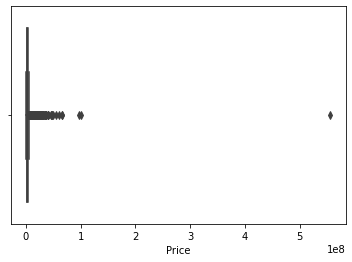

In [45]:
sns.boxplot(df['Price'])

In [46]:

Q1 = np.percentile(df["Price"],25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1
Fare_outlier_rows = df[(df["Price"] < Q1 - 1.5*IQR) | (df["Price"] > Q3 + 1.5*IQR )].index
len(Fare_outlier_rows)

2781

In [47]:
z_score = (df["Price"] - df["Price"].mean()) / df["Price"].std()
outliers = abs(z_score) > 3
sum(outliers)

df.Price[df.Price<300000] =np.nan
df.Price[outliers]=np.nan
df.dropna(subset = ["Price"], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df,Numbers_for_Cities_in_df
0,משה שרת,5.0,1,3120000.0,2,1,2,1,2,114,1,1
1,יד שלום,4.0,1,4480000.0,1,1,1,2,2,140,2,1
2,פיקוס 5,6.0,0,2250000.0,2,1,1,2,2,180,2,2
3,שלם,3.0,1,2150000.0,1,1,1,1,1,80,1,1
4,הפלמ''ח,3.0,2,2500000.0,2,2,1,2,2,100,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
37119,משה לוי 1,5.0,3,2250000.0,1,1,1,2,2,125,1,7
37120,דולפין,5.0,8,1450000.0,1,2,2,2,2,120,1,62
37121,דרך מצדה,3.0,2,730000.0,2,2,1,1,1,76,1,23
37122,יוני נתניהו,6.0,4,3700000.0,2,1,2,2,2,170,1,15


<AxesSubplot:xlabel='Size of house per mm'>

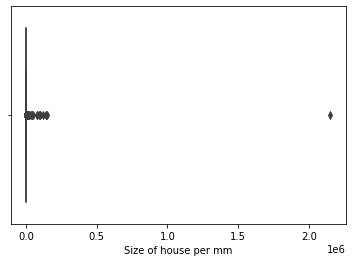

In [48]:
df['Size of house per mm'] = df['Size of house per mm'].str.extract('(\d+)')
#for value in df['Size of house per mm']:
#    if()
df['Size of house per mm']=df['Size of house per mm'].astype('int')
sns.boxplot(df['Size of house per mm'])

In [49]:
Q1 = np.percentile(df["Size of house per mm"],25)
Q3 = np.percentile(df["Size of house per mm"], 75)
IQR = Q3 - Q1
Fare_outlier_rows = df[(df["Size of house per mm"] < Q1 - 1.5*IQR) | (df["Size of house per mm"] > Q3 + 1.5*IQR )].index
len(Fare_outlier_rows)

3142

In [50]:
z_score = (df["Size of house per mm"] - df["Size of house per mm"].mean()) / df["Size of house per mm"].std()
outliers = abs(z_score) > 3
sum(outliers)
df["Size of house per mm"][df["Size of house per mm"]<10] =np.nan
df["Size of house per mm"][df["Size of house per mm"]>150000] =np.nan
df.dropna(subset = ["Size of house per mm"], inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df,Numbers_for_Cities_in_df
0,משה שרת,5.0,1,3120000.0,2,1,2,1,2,114.0,1,1
1,יד שלום,4.0,1,4480000.0,1,1,1,2,2,140.0,2,1
2,פיקוס 5,6.0,0,2250000.0,2,1,1,2,2,180.0,2,2
3,שלם,3.0,1,2150000.0,1,1,1,1,1,80.0,1,1
4,הפלמ''ח,3.0,2,2500000.0,2,2,1,2,2,100.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36978,משה לוי 1,5.0,3,2250000.0,1,1,1,2,2,125.0,1,7
36979,דולפין,5.0,8,1450000.0,1,2,2,2,2,120.0,1,62
36980,דרך מצדה,3.0,2,730000.0,2,2,1,1,1,76.0,1,23
36981,יוני נתניהו,6.0,4,3700000.0,2,1,2,2,2,170.0,1,15


In [51]:
df.to_csv("data cleaning new1.csv" ,encoding = 'utf-8-sig')